## Pandasでよく使う操作

In [1]:
import numpy as np
import pandas as pd

### 辞書としてのSeries
pythonの辞書よりも遥かに効率的である。

順番を指定する場合

In [2]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

順番を指定しない場合

In [3]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [4]:
population['California']

38332521

In [5]:
#スライス機能も使える
population['California':'Illinois'] #numpyのスライス違ってスライスの最後は含まれる

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

当然python辞書と同じような事もできる

In [6]:
population.keys()

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [7]:
print("New York" in population)
print(38332521 in population)

True
False


In [8]:
list(population.items())

[('California', 38332521),
 ('Texas', 26448193),
 ('New York', 19651127),
 ('Florida', 19552860),
 ('Illinois', 12882135)]

### 文字列操作の一部としてのSeries
生のPythonで操作するよりもpandasのほうが効率もいいしコードも短くすむ。Noneによるエラーも発生せずに済む。
Series.str.hoge()で呼び出せる。

In [9]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [10]:
print("capitalize\n"+str(names.str.capitalize())) #表記の揺れを統一する（1文字目だけ大文字にする）
print()

print("lower\n"+str(names.str.lower())) #表記の揺れを統一する（1文字目だけ大文字にする）

capitalize
0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

lower
0    peter
1     paul
2     None
3     mary
4    guido
dtype: object


メソッド一覧

Python組み込みと同様なもの

|　|　|　|　|
|:-----------:|:----------------:|:----------------:|:----------------:|
|``len()``    | ``lower()``      | ``translate()``  | ``islower()``    | 
|``ljust()``  | ``upper()``      | ``startswith()`` | ``isupper()``    | 
|``rjust()``  | ``find()``       | ``endswith()``   | ``isnumeric()``  | 
|``center()`` | ``rfind()``      | ``isalnum()``    | ``isdecimal()``  | 
|``zfill()``  | ``index()``      | ``isalpha()``    | ``split()``      | 
|``strip()``  | ``rindex()``     | ``isdigit()``    | ``rsplit()``     | 
|``rstrip()`` | ``capitalize()`` | ``isspace()``    | ``partition()``  | 
|``lstrip()`` |  ``swapcase()``  |  ``istitle()``   | ``rpartition()`` |





正規表現

In [11]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])
print(monte.str.extract('([A-Za-z]+)', expand=False)) #First nameの抽出
print()
print(monte.str.findall(r'^[^AEIOU].*[^aeiou]$')) #子音で始まり子音で終わる名前

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object


正規表現を使うもの

| Method | Description |
|--------|-------------|
| ``match()`` | Call ``re.match()`` on each element, ブール値を返す. |
| ``extract()`` | Call ``re.match()`` on each element, マッチした文字列を返す.|
| ``findall()`` | Call ``re.findall()`` on each element |
| ``replace()`` | 指定したパターンを別の文字列で置き換える|
| ``contains()`` | Call ``re.search()`` on each element, ブール値を返す |
| ``count()`` | パターンの出現回数を返す|
| ``split()``   | Equivalent to ``str.split()``, but accepts regexps 正規表現を指定して分割できる|
| ``rsplit()`` | Equivalent to ``str.rsplit()``, but accepts regexps |


その他のメソッド

In [12]:
#文字数で切り出す
monte.str[:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [13]:
#文字列からダミー変数化
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [14]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


その他のメソッド

| Method | Description |
|--------|-------------|
| ``get()`` | Index each element |
| ``slice()`` | Slice each element|
| ``slice_replace()`` | Replace slice in each element with passed value|
| ``cat()``      | Concatenate strings|
| ``repeat()`` | Repeat values |
| ``normalize()`` | Return Unicode form of string |
| ``pad()`` | Add whitespace to left, right, or both sides of strings|
| ``wrap()`` | Split long strings into lines with length less than a given width|
| ``join()`` | Join strings in each element of the Series with passed separator|
| ``get_dummies()`` | extract dummy variables as a dataframe |


### 順序付き集合としてのIndex
seriesもdataframeもIndexを持つが、順序付き集合としての機能を持つ。いちいちpython setに変換せずに済むので便利

In [15]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])
print(indA & indB) #積集合
print(indA | indB) #和集合
print(indA ^ indB) #対称差

Int64Index([3, 5, 7], dtype='int64')
Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')
Int64Index([1, 2, 9, 11], dtype='int64')


### DataFrameの作り方

ネットでよくやられてるやつ ~~でも列の順番が入れ替わったりする~~ 最近のPandasのupdateで大丈夫になった

In [16]:
pd.DataFrame({
    "first":[5,2],
    "second":[3,4]
})

,first,second
0,5,3
1,2,4


辞書のリストから作る　前者よりは賢そう

In [17]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
data

[{'a': 0, 'b': 0}, {'a': 1, 'b': 2}, {'a': 2, 'b': 4}]

In [18]:
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


Numpy配列から作る deepの結果をpandasに変換するときとか便利そう

In [19]:
data = np.random.rand(3, 2)
print(data)
pd.DataFrame(data,
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

[[ 0.63033374  0.40137748]
 [ 0.03583907  0.63975007]
 [ 0.86855608  0.70465696]]


,foo,bar
a,0.630334,0.401377
b,0.035839,0.639750
c,0.868556,0.704657


### データフレームに新しい行を作る

すでにあるデータから計算する場合

In [20]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [21]:
data['density'] = data['pop'] / data['area'] #なんと簡単
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


### 条件に合うデータに絞る
locはmaskとしても働く

In [22]:
data.density>100

California    False
Texas         False
New York       True
Florida        True
Illinois      False
Name: density, dtype: bool

In [23]:
data.loc[data.density>100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


In [24]:
data.loc[data.density>100,["area", "pop"]] #行も一緒に指定できる

,area,pop
New York,141297,19651127
Florida,170312,19552860


### 正規表現で条件に合うindexに絞る

In [25]:
data.index.str.contains('li')

array([ True, False, False, False,  True], dtype=bool)

In [26]:
# liが含まれているindexだけ探したい
data[data.index.str.contains('li')]

,area,pop,density
California,423967,38332521,90.413926
Illinois,149995,12882135,85.883763


### Pandasのデータに同じ加工をする
実はnumpyをにそのまま噛ませれば良い

In [27]:
np.sqrt(data) #返り値もpandasである

,area,pop,density
California,651.127484,6191.326271,9.508624
Texas,834.063547,5142.780668,6.165934
New York,375.894932,4432.959170,11.793080
Florida,412.688745,4421.861599,10.714762
Illinois,387.291880,3589.169124,9.267349


### 欠損値の扱い

null値の検出

In [28]:
data = pd.Series([1, np.nan, 'hello', None])
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [29]:
data.isnull(), data.notnull()

(0    False
 1     True
 2    False
 3     True
 dtype: bool, 0     True
 1    False
 2     True
 3    False
 dtype: bool)

欠損値の除外

In [30]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [31]:
df.dropna()

,0,1,2
1,2.0,3.0,5


オプションとして,howとaxisとthreshがある。`how="all"`ですべてnullの行(列)を削除。デフォでは`how="any"`。axisは、軸の指定。またthreshでnull以外がいくつ以上で残すか決めることもできる

In [32]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [33]:
df.dropna(axis="rows", thresh=3) #非nullが3つ以上なのは1だけ

,0,1,2
1,2.0,3.0,5


欠損値の埋め合わせ

In [34]:
df #データはこんな感じ

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


0で埋め合わせる

In [35]:
df.fillna(0) #他の数字で埋め合わせることも可能

,0,1,2
0,1.0,0.0,2
1,2.0,3.0,5
2,0.0,4.0,6


前の数字で埋め合わせる

In [36]:
df.fillna(method="ffill") #後ろ向きのbfillもある

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,2.0,4.0,6


In [37]:
df.fillna(method="bfill", axis="columns")

,0,1,2
0,1.0,2.0,2.0
1,2.0,3.0,5.0
2,4.0,4.0,6.0


### 階層型インデックス
今までpanelとかで操作してきたけど多分こっちのほうがめっちゃ便利

例えばこんなもの

In [38]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
index = pd.MultiIndex.from_tuples(index)
index #まじでインデックスだけを持っている

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           codes=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [39]:
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations,index=index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [40]:
pop.loc["New York":"Texas", 2000] #複数のindexで絞ることも可能

New York  2000    18976457
Texas     2000    20851820
dtype: int64

Seriesならばunstackとstackでdfに変換したりできる

In [41]:
pop.unstack()

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [42]:
pop.unstack().stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

dfでの計算操作も今まで通り

In [43]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [44]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


MultiIndexの作り方

DataFrame作成時に暗黙的に作成するやり方。→indexにリストのリストを入れれば良し

In [45]:
np.arange(8).reshape(4,2)

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [46]:
df = pd.DataFrame(np.arange(8).reshape(4, 2),
                  index=[['a', 'a', 'b', 'b'], 
                         [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1  data2
a 1      0      1
  2      2      3
b 1      4      5
  2      6      7

辞書からも暗黙的に作れる。もうちょっとスマートである。ポイントは、keyにタプルを作ることである。

In [47]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

明示的にMultiIndexを作る
様々な作り方がある

In [48]:
#配列から作る
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], 
                           [1, 2, 1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [49]:
#タプルから作る
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [50]:
#デカルト積から作る
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

複数のindexに名前をふる

In [51]:
pop.index.names = ['state', 'year'] #リストで複数指定可能

In [52]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

データフレームの行列両方にマルチインデクスにする

In [53]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), decimals=1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
# DFを作るときに
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      46.0  37.5  32.0  35.4  31.0  36.9
     2      41.0  35.2  37.0  39.8  16.0  37.7
2014 1      38.0  36.8  47.0  37.1  30.0  37.0
     2      35.0  37.4  40.0  35.9  50.0  35.9

データの指定

In [54]:
health_data["Bob","HR"]

year  visit
2013  1        46.0
      2        41.0
2014  1        38.0
      2        35.0
Name: (Bob, HR), dtype: float64

In [55]:
health_data.loc[:,"Bob":"Guido"]

subject      Bob       Guido      
type          HR  Temp    HR  Temp
year visit                        
2013 1      46.0  37.5  32.0  35.4
     2      41.0  35.2  37.0  39.8
2014 1      38.0  36.8  47.0  37.1
     2      35.0  37.4  40.0  35.9

In [56]:
health_data.loc[:,("Bob","Temp"):("Guido","HR")]

subject      Bob Guido
type        Temp    HR
year visit            
2013 1      37.5  32.0
     2      35.2  37.0
2014 1      36.8  47.0
     2      37.4  40.0

In [57]:
idx = pd.IndexSlice #idxスライスを使わないとエラーになる(pythonスライスはだめ)
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,46.0,32.0,31.0
2014,1,38.0,47.0,30.0


マルチインデックスの変形

そのままで他のデータフレームと結合等しようとするとエラーが出る場合が存在する。
そこでスタイリッシュに変形する方法をここに記録しておく。

In [58]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      46.0  37.5  32.0  35.4  31.0  36.9
     2      41.0  35.2  37.0  39.8  16.0  37.7
2014 1      38.0  36.8  47.0  37.1  30.0  37.0
     2      35.0  37.4  40.0  35.9  50.0  35.9

In [59]:
doctor = pd.Series(["Joji", "Sue", "Gondou", "Tatara"], index=health_data.index, name="Doctor")
doctor

year  visit
2013  1          Joji
      2           Sue
2014  1        Gondou
      2        Tatara
Name: Doctor, dtype: object

In [60]:
pd.concat([doctor,health_data],axis="columns") #一応できるけど結合が気持ちわるい感じになる

Doctor  (Bob, HR)  (Bob, Temp)  (Guido, HR)  (Guido, Temp)  \
year visit                                                               
2013 1        Joji       46.0         37.5         32.0           35.4   
     2         Sue       41.0         35.2         37.0           39.8   
2014 1      Gondou       38.0         36.8         47.0           37.1   
     2      Tatara       35.0         37.4         40.0           35.9   

            (Sue, HR)  (Sue, Temp)  
year visit                          
2013 1           31.0         36.9  
     2           16.0         37.7  
2014 1           30.0         37.0  
     2           50.0         35.9

In [61]:
health_data.columns = health_data.columns.map("|".join)
health_data = pd.concat([doctor,health_data],axis="columns",sort=False) # Future warning in sort
health_data #見た目がいいだけではなくこのあとの処理を楽にする効果もある

Doctor  Bob|HR  Bob|Temp  Guido|HR  Guido|Temp  Sue|HR  Sue|Temp
year visit                                                                  
2013 1        Joji    46.0      37.5      32.0        35.4    31.0      36.9
     2         Sue    41.0      35.2      37.0        39.8    16.0      37.7
2014 1      Gondou    38.0      36.8      47.0        37.1    30.0      37.0
     2      Tatara    35.0      37.4      40.0        35.9    50.0      35.9

In [62]:
#再びマルチインデクスなものにもどす

In [63]:
def process_index(k):
    return tuple(k.split("|"))
health_data.columns = pd.MultiIndex.from_tuples([process_index(k) for k,_ in health_data.iteritems()])
health_data

Doctor   Bob       Guido         Sue      
               NaN    HR  Temp    HR  Temp    HR  Temp
year visit                                            
2013 1        Joji  46.0  37.5  32.0  35.4  31.0  36.9
     2         Sue  41.0  35.2  37.0  39.8  16.0  37.7
2014 1      Gondou  38.0  36.8  47.0  37.1  30.0  37.0
     2      Tatara  35.0  37.4  40.0  35.9  50.0  35.9

マルチインデクスはソートする必要がある場合もある

In [64]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.488628
      2      0.216238
c     1      0.405450
      2      0.188711
b     1      0.233207
      2      0.282291
dtype: float64

In [65]:
#data.loc["a":"b"] 実行すると以下のようなエラーになります

# ---------------------------------------------------------------------------
# UnsortedIndexError                        Traceback (most recent call last)
# <ipython-input-103-2a5d331a3674> in <module>
# ----> 1 data.loc["a":"b"]
#中略
#UnsortedIndexError: 'Key length (1) was greater than MultiIndex lexsort depth (0)'

In [66]:
data = data.sort_index() #ソートしてやればエラーは出なくなる
print(data)
data.loc["a":"b"]

char  int
a     1      0.488628
      2      0.216238
b     1      0.233207
      2      0.282291
c     1      0.405450
      2      0.188711
dtype: float64


char  int
a     1      0.488628
      2      0.216238
b     1      0.233207
      2      0.282291
dtype: float64

すでにあるdfからMultiIndex化する。
set_indexで複数の列を指定すればok。便利なので多用しそう。

In [67]:
pop_flat = pop.reset_index(name="population")
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [68]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

MultiIndexのデータの集約
levelを指定してやれば良い

In [69]:
health_data

Doctor   Bob       Guido         Sue      
               NaN    HR  Temp    HR  Temp    HR  Temp
year visit                                            
2013 1        Joji  46.0  37.5  32.0  35.4  31.0  36.9
     2         Sue  41.0  35.2  37.0  39.8  16.0  37.7
2014 1      Gondou  38.0  36.8  47.0  37.1  30.0  37.0
     2      Tatara  35.0  37.4  40.0  35.9  50.0  35.9

In [70]:
health_data.mean(level='year') #年より下のレベル visitが潰されて集約されている

Bob        Guido         Sue       
        HR   Temp    HR  Temp    HR   Temp
year                                      
2013  43.5  36.35  34.5  37.6  23.5  37.30
2014  36.5  37.10  43.5  36.5  40.0  36.45

MultiIndexとしてデータフレームを結合する
pd.concatにkeysを指定すれば良い

In [71]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])

pd.concat([df1,df2])

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [72]:
pd.concat([df1,df2],keys=["x","y"])

A   B
x 1  A1  B1
  2  A2  B2
y 3  A3  B3
  4  A4  B4

### 集約とグループ化
代表的な統計量の計算などをすばやくやる

In [73]:
import seaborn as sns
planets = sns.load_dataset('planets')
print(planets.shape)
print(planets.isna().sum()) #欠損値がある
planets.head()

(1035, 6)
method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


カテゴリカルなやつの重複を数える

In [74]:
#methodの重複を数える
planets["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

すべての特徴の概要

In [75]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


グループごとに情報を統計量に集約する
groupbyを使う

In [76]:
planets.groupby("method").describe()

number                                           \
                               count      mean       std  min  25%  50%   75%   
method                                                                          
Astrometry                       2.0  1.000000  0.000000  1.0  1.0  1.0  1.00   
Eclipse Timing Variations        9.0  1.666667  0.500000  1.0  1.0  2.0  2.00   
Imaging                         38.0  1.315789  0.933035  1.0  1.0  1.0  1.00   
Microlensing                    23.0  1.173913  0.387553  1.0  1.0  1.0  1.00   
Orbital Brightness Modulation    3.0  1.666667  0.577350  1.0  1.5  2.0  2.00   
Pulsar Timing                    5.0  2.200000  1.095445  1.0  1.0  3.0  3.00   
Pulsation Timing Variations      1.0  1.000000       NaN  1.0  1.0  1.0  1.00   
Radial Velocity                553.0  1.721519  1.157141  1.0  1.0  1.0  2.00   
Transit                        397.0  1.954660  1.399119  1.0  1.0  1.0  2.00   
Transit Timing Variations        4.0  2.250000  0.500000  2.0  2.0  2.0  2.25   

                                   orbital_period                 ...  \
                               max          count           mean  ...   
method                                                            ...   
Astrometry                     1.0            2.0     631.180000  ...   
Eclipse Timing Variations      2.0            9.0    4751.644444  ...   
Imaging                        4.0           12.0  118247.737500  ...   
Microlensing                   2.0            7.0    3153.571429  ...   
Orbital Brightness Modulation  2.0            3.0       0.709307  ...   
Pulsar Timing                  3.0            5.0    7343.021201  ...   
Pulsation Timing Variations    1.0            1.0    1170.000000  ...   
Radial Velocity                6.0          553.0     823.354680  ...   
Transit                        7.0          397.0      21.102073  ...   
Transit Timing Variations      3.0            3.0      79.783500  ...   

                                distance            year               \
                                     75%      max  count         mean   
method                                                                  
Astrometry                       19.3225    20.77    2.0  2011.500000   
Eclipse Timing Variations       500.0000   500.00    9.0  2010.000000   
Imaging                         132.6975   165.00   38.0  2009.131579   
Microlensing                   4747.5000  7720.00   23.0  2009.782609   
Orbital Brightness Modulation  1180.0000  1180.00    3.0  2011.666667   
Pulsar Timing                  1200.0000  1200.00    5.0  1998.400000   
Pulsation Timing Variations          NaN      NaN    1.0  2007.000000   
Radial Velocity                  59.2175   354.00  553.0  2007.518987   
Transit                         650.0000  8500.00  397.0  2011.236776   
Transit Timing Variations      1487.0000  2119.00    4.0  2012.500000   

                                                                           \
                                    std     min      25%     50%      75%   
method                                                                      
Astrometry                     2.121320  2010.0  2010.75  2011.5  2012.25   
Eclipse Timing Variations      1.414214  2008.0  2009.00  2010.0  2011.00   
Imaging                        2.781901  2004.0  2008.00  2009.0  2011.00   
Microlensing                   2.859697  2004.0  2008.00  2010.0  2012.00   
Orbital Brightness Modulation  1.154701  2011.0  2011.00  2011.0  2012.00   
Pulsar Timing                  8.384510  1992.0  1992.00  1994.0  2003.00   
Pulsation Timing Variations         NaN  2007.0  2007.00  2007.0  2007.00   
Radial Velocity                4.249052  1989.0  2005.00  2009.0  2011.00   
Transit                        2.077867  2002.0  2010.00  2012.0  2013.00   
Transit Timing Variations      1.290994  2011.0  2011.75  2012.5  2013.25   

                                       
                                  

In [77]:
planets.groupby("method")["orbital_period"].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [78]:
planets.groupby("method").aggregate(["min", np.median, max]) #任意の統計量を計算できる #aggreate()

number            orbital_period                \
                                 min median max            min        median   
method                                                                         
Astrometry                         1      1   1     246.360000    631.180000   
Eclipse Timing Variations          1      2   2    1916.250000   4343.500000   
Imaging                            1      1   4    4639.150000  27500.000000   
Microlensing                       1      1   2    1825.000000   3300.000000   
Orbital Brightness Modulation      1      2   2       0.240104      0.342887   
Pulsar Timing                      1      3   3       0.090706     66.541900   
Pulsation Timing Variations        1      1   1    1170.000000   1170.000000   
Radial Velocity                    1      1   6       0.736540    360.200000   
Transit                            1      1   7       0.355000      5.714932   
Transit Timing Variations          2      2   3      22.339500     57.011000   

                                                mass               distance  \
                                         max     min median    max      min   
method                                                                        
Astrometry                       1016.000000     NaN    NaN    NaN    14.98   
Eclipse Timing Variations       10220.000000  4.2000  5.125   6.05   130.72   
Imaging                        730000.000000     NaN    NaN    NaN     7.69   
Microlensing                     5100.000000     NaN    NaN    NaN  1760.00   
Orbital Brightness Modulation       1.544929     NaN    NaN    NaN  1180.00   
Pulsar Timing                   36525.000000     NaN    NaN    NaN  1200.00   
Pulsation Timing Variations      1170.000000     NaN    NaN    NaN      NaN   
Radial Velocity                 17337.500000  0.0036  1.260  25.00     1.35   
Transit                           331.600590  1.4700  1.470   1.47    38.00   
Transit Timing Variations         160.000000     NaN    NaN    NaN   339.00   

                                                  year                
                                 median      max   min  median   max  
method                                                                
Astrometry                       17.875    20.77  2010  2011.5  2013  
Eclipse Timing Variations       315.360   500.00  2008  2010.0  2012  
Imaging                          40.395   165.00  2004  2009.0  2013  
Microlensing                   3840.000  7720.00  2004  2010.0  2013  
Orbital Brightness Modulation  1180.000  1180.00  2011  2011.0  2013  
Pulsar Timing                  1200.000  1200.00  1992  1994.0  2011  
Pulsation Timing Variations         NaN      NaN  2007  2007.0  2007  
Radial Velocity                  40.445   354.00  1989  2009.0  2014  
Transit                         341.000  8500.00  2002  2012.0  2014  
Transit Timing Variations       855.000  2119.00  2011  2012.5  2014

### ピボットテーブルによる多次元集計
groupbyの多次元版。ぶっちゃけこれを知ってればgroupbyがなくても乗り切れる気がする。

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


"survive"についての平均値をindex="sex", colums="class"で見てみる。

In [80]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [81]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc=["mean","median"], margins=True) #多数の統計量について知ることもできる。
#marginで全体で計算した場合の行と列も表示

mean                               median                 
class      First    Second     Third       All  First Second Third All
sex                                                                   
female  0.968085  0.921053  0.500000  0.742038    1.0    1.0   0.5   1
male    0.368852  0.157407  0.135447  0.188908    0.0    0.0   0.0   0
All     0.629630  0.472826  0.242363  0.383838    1.0    0.0   0.0   0

In [82]:
#辞書で引き渡せば、知りたい情報だけを表示してくれる
titanic.pivot_table(index='sex', columns='class', aggfunc={'survived':sum, 'fare':'mean'})
#survivedとfareについて計算するのが暗示されているので第一引数にわたすとエラーになることに注意

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

多重インデクスを用いたpivot table
今まで通りリストで受け渡せば良い

In [83]:
#準備のためにデータを加工
age = pd.cut(titanic['age'], [0, 18, 80])
age.head() #新たな特徴量の列だと思えばよい

0    (18, 80]
1    (18, 80]
2    (18, 80]
3    (18, 80]
4    (18, 80]
Name: age, dtype: category
Categories (2, interval[int64]): [(0, 18] < (18, 80]]

In [84]:
titanic.pivot_table('survived', index=['sex', age], columns='class') #ageはすでにあるかのように処理できる

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [85]:
fare = pd.qcut(titanic['fare'], 2) #cutと異なり分位点で切る。4なら四分位点
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

### 時系列の操作
時系列マンとしては覚えておきたい

pandasの時系列データ構造は三種ある
- timestamp (最も基本)
- period
- time delta


時刻によるインデックス

indexはpd.DatetimeIndexかpd.to_datetimeを使うが、さまざまな形式を解析できるto_datetimeを使うのが一般的

In [86]:
index = pd.to_datetime(['20140704', '2014-08-04',
                          '4th of July, 2015', '08-04-2015'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [87]:
data.index

DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'], dtype='datetime64[ns]', freq=None)

In [88]:
data.index.strftime("%A") #曜日取得もお手の物

Index(['Friday', 'Monday', 'Saturday', 'Tuesday'], dtype='object')

In [89]:
print(data['2014-07-04':'2015-07-04']) #スライスももちろん使用可能
print()
print(data["2015"]) #スライスじゃなくても複数指定可能

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

2015-07-04    2
2015-08-04    3
dtype: int64


頻度とオフセットの概念が存在する

頻度

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day 日次        | ``B``  | Business day 毎営業日        |
| ``W``  | Weekly       曜次    |                              |
| ``M``  | Month end    月末ごと       | ``BM`` | Business month end 月の最終営業日ごと  |
| ``Q``  | Quarter end  四半期ごと       | ``BQ`` | Business quarter end 四半期の最終営業日ごと|
| ``A``  | Year end     年末ごと       | ``BA`` | Business year end  年度末営業日ごと  |
| ``H``  | Hours        毎時       | ``BH`` | Business hours   営業時間ごと    |
| ``T``  | Minutes      毎分       |                              |
| ``S``  | Seconds      毎秒       |                              |
| ``L``  | Milliseonds  枚ミリ秒       |                              |
| ``U``  | Microseconds 枚マイクロ秒       |                              |
| ``N``  | nanoseconds  毎ナノ秒       |                              |

オフセット 期間の開始を変更することもできる。があまり使わないので省略



In [90]:
#1時間ごとのtimeIndexを作る
pd.date_range('2015-07-03', periods=8, freq='H') #freqで頻度を指定している

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

頻度変換
サンプリングレートを変更する

- asfreq ... ある点を選択することでダウンサプリング
- resample ... 潰される点の情報を集約してダウンサプリング

In [91]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='yahoo') #googleのAPIは死んだらしいのでyahooで代用
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.693783,47.669952,49.676899,49.845802,44994500.0,49.845802
2004-08-20,54.187561,49.925285,50.178635,53.805050,23005800.0,53.805050
2004-08-23,56.373344,54.172661,55.017166,54.346527,18393200.0,54.346527
2004-08-24,55.439419,51.450363,55.260582,52.096165,15361800.0,52.096165
2004-08-25,53.651051,51.604362,52.140873,52.657513,9257400.0,52.657513


In [92]:
goog = goog['Close']

In [93]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
%matplotlib inline

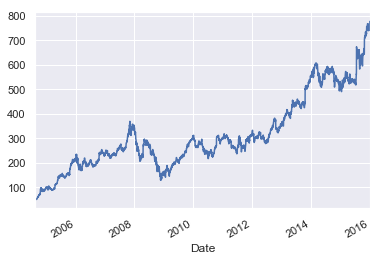

In [94]:
goog.plot();

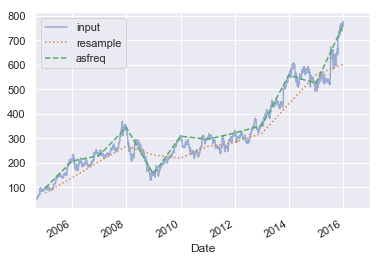

In [95]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':') #平均値で集約
goog.asfreq('BA').plot(style='--'); #点を選択
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

時間シフト

- shift ... データをシフト
- tshift ... インデックスをシフト

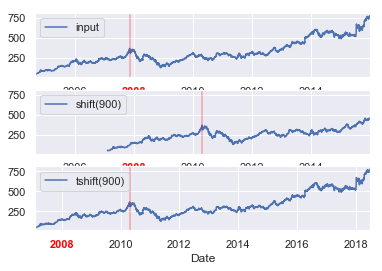

In [96]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1]) #データをシフト
goog.tshift(900).plot(ax=ax[2]) #インデックスをシフト

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

窓関数

- rolling() ... 移動平均とかを計算できる。groupbyと同じような使い方

統計量計算が一気に楽になりそう

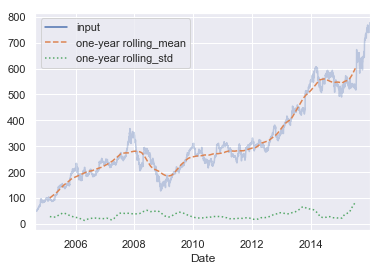

In [97]:
rolling = goog.rolling(365, center=True) #1年で窓関数を作る

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(), #平均
                     'one-year rolling_std': rolling.std()}) #標準偏差
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

### Pandasを使ったplot

dfがそのまま時系列なのならば、df.plotで事は済むが、そんなことは稀である。
よく使いそうなのは
- 棒グラフ ...bar
- ヒストグラム ...hist, kde(密度推定もついでにしてくれる)
- ボックスプロット ...box
- 散布図 ...scatter

In [98]:
df = pd.DataFrame(np.random.randn(10, 4), columns=list('ABCD'))
df.head()

,A,B,C,D
0,0.347271,-1.554872,0.104575,0.249836
1,-1.669939,1.084829,1.219281,-1.317295
2,-0.031984,-1.465343,0.231325,-0.888835
3,1.653902,-0.297504,-0.559109,-0.467210
4,-0.314536,-0.625411,-2.278514,-0.103733


棒グラフ

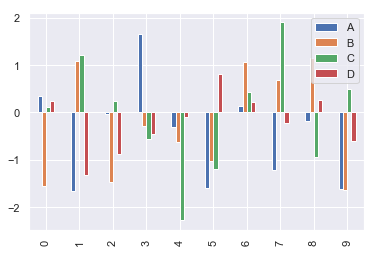

In [99]:
df.plot.bar(); #各サンプルについての可視化(あんま使わんだろうけど)

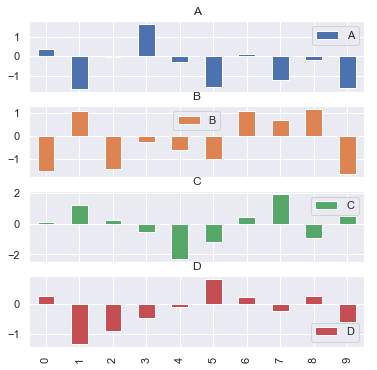

In [100]:
df.plot.bar(subplots=True, figsize=(6, 6)); #sabplotにすると見やすい

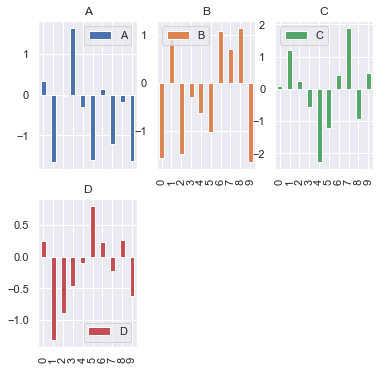

In [101]:
df.plot.bar(subplots=True, figsize=(6, 6),layout=(2, 3)); #二行三列に指定

A   -4.509309
B   -2.626240
C   -0.612016
D   -2.074352
dtype: float64


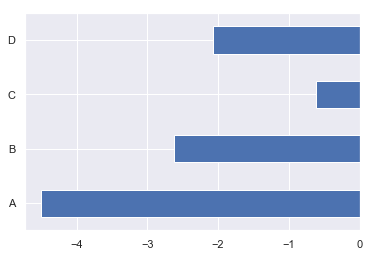

In [102]:
print(df.sum()) #合計の可視化
df.sum().plot.barh(); #barhの横向きは見栄えが良い

ヒストグラム(kdeも可)

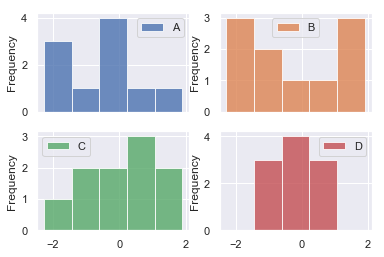

In [103]:
df.plot.hist(alpha=0.8,subplots=True,layout=(2,2), bins=5);

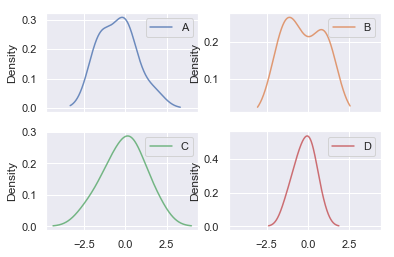

In [104]:
df.plot.kde(alpha=0.8,subplots=True,layout=(2,2)); #密度推定

Boxplot **いままでと違って.plot.boxではなく**`boxplot`なので注意

ハズレ値をみたり、CVで性能見るときとかに使うね

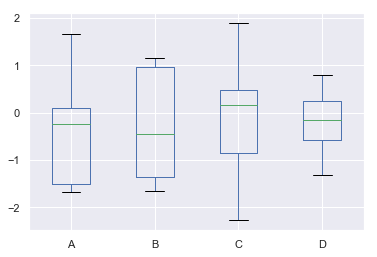

In [105]:
df.boxplot();

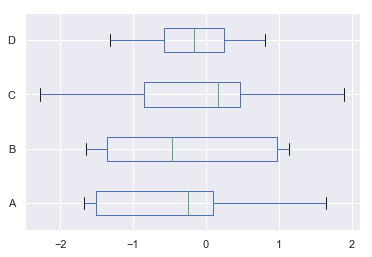

In [106]:
df.plot.box(vert=False);

In [107]:
df = pd.concat([df,pd.Series(["cate1"]*5+["CATE2"]*5, name="category"),pd.Series(["fea1"]*2+["FEA2"]*8, name="feature")],axis=1)
df.head()

,A,B,C,D,category,feature
0,0.347271,-1.554872,0.104575,0.249836,cate1,fea1
1,-1.669939,1.084829,1.219281,-1.317295,cate1,fea1
2,-0.031984,-1.465343,0.231325,-0.888835,cate1,FEA2
3,1.653902,-0.297504,-0.559109,-0.467210,cate1,FEA2
4,-0.314536,-0.625411,-2.278514,-0.103733,cate1,FEA2


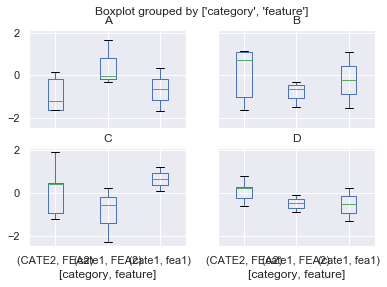

In [108]:
df.boxplot(by=["category","feature"]); #byでいろいろカテゴリごとに見られる